To run this colab you can use your own colab setup or try
[Sandwich Image Compression Image Codec Proxy](https://colab.research.google.com/github/google/sandwiched_compression/blob/main/image_codec_proxy.ipynb).


In [ ]:
!pip install -q mediapy

In [ ]:
!git clone https://github.com/google/sandwiched_compression
!mv sandwiched_compression/* .

In [ ]:
import tensorflow as tf

import mediapy as media
from image_compression import encode_decode_intra_lib
import compress_intra_model
import datasets

In [ ]:
# https://www.tensorflow.org/datasets
def dataset_fn(
    batch_size: int, training_mode: bool, take_count: int = 100
) -> tf.data.Dataset:
  return datasets.load_tfds_image_dataset(
      batch_size=batch_size,
      training_mode=training_mode,
      dataset_name='clic',
      target_size=256,
  ).take(
      take_count  # Will draw take_count batches randomly in each epoch.
  )  # Images are 256x256

In [ ]:
eval_batch_size = 4
eval_dataset = dataset_fn(eval_batch_size, False)  # Pull from eval split.

In [ ]:
intra_compression_layer = encode_decode_intra_lib.EncodeDecodeIntra(
    rounding_fn=compress_intra_model.differentiable_round,
    qstep_init=30.0,
    train_qstep=False,  # Set to True when training a sandwich.
    convert_to_yuv=True,  # Set to False when training a sandwich.
)

<dtype: 'float32'> (4, 256, 256, 3) (4, 256, 256, 3) (4,)


,,,

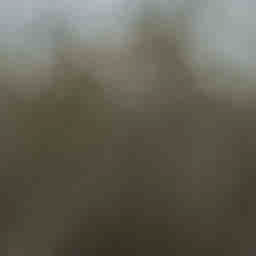
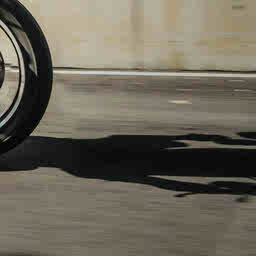
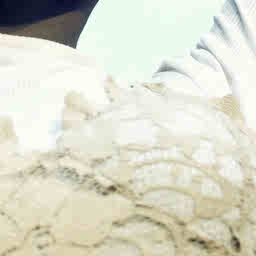
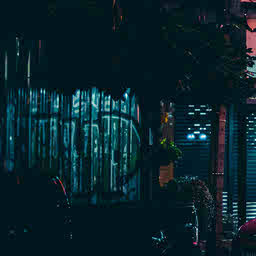

<dtype: 'float32'> (4, 256, 256, 3) (4, 256, 256, 3) (4,)


,,,

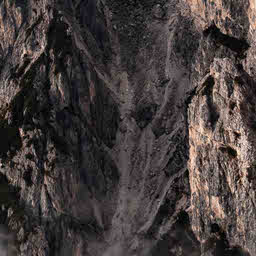
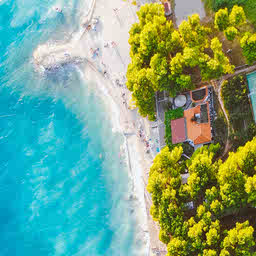
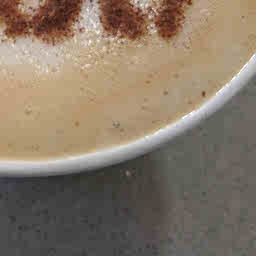
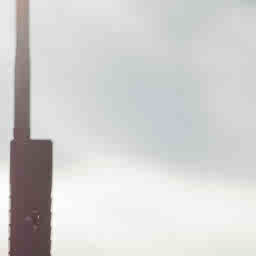

In [ ]:
show_count = 2
for idx, sample in enumerate(eval_dataset):
  if idx >= show_count:
    break
  images = sample['image']
  compressed_images, rate = intra_compression_layer(images)

  print(images.dtype, images.shape, compressed_images.shape, rate.shape)
  media.show_images(compressed_images[0:eval_batch_size] / 255)